## LIBRARIES

In [1]:
import sys
import os
try:
    sys.path.append("/usr/local/lib/python3.9/site-packages")
except:
    pass

from preprocessing import fill_empty, drop_empty, variable_coding, variable_encoding
from algorithms import stirr, rock, kmodes, stirr_calculate_output, kmodes_calculate_outliers
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import cm
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from time import time
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
%matplotlib inline

## DATASETS

In [2]:
path = "datasets"
df_0 = pd.read_csv(os.path.join(path, "primary-tumor.data.csv"), sep=";")
df_1 = pd.read_csv(os.path.join(path, "lymphography.data.csv"), sep=";")
df_2 = pd.read_csv(os.path.join(path, "Effects on personality due to Covid-19 (Responses) - Form Responses 1.csv"), sep=";")
df_2.drop(["Timestamp", "Enter your name"], axis=1, inplace=True)
df_3 = pd.read_csv(os.path.join(path, "SPECT.csv"), sep=";")

## DATASETS DESCRIPTION

In [3]:
datasets_names = ["primary-tumor", "lymphography", "covid", "SPECT"]
rows = []
columns = []
values = []
coding_dict = [None]*4
datasets = [df_0, df_1, df_2, df_3]
for i in range(len(datasets)):
    cat_columns = list(datasets[i].columns)
    datasets[i] = fill_empty(datasets[i], cat_columns)
    datasets[i], coding_dict[i] = variable_coding(datasets[i], cat_columns)
    rows.append(datasets[i].shape[0])
    columns.append(datasets[i].shape[1])
    values.append(np.sum([len(datasets[i][col].unique()) for col in datasets[i]]))
    
df_stats = pd.DataFrame({"Name": datasets_names, "Rows": rows, "Columns": columns, 
              "Values": values})

df_stats

,Name,Rows,Columns,Values
0,primary-tumor,339,18,58
1,lymphography,148,19,62
2,covid,204,16,91
3,SPECT,267,23,46


## 5% OF OUTLIERS

In [69]:
rock_parameters = [(14, 0.7), (8, 0.58), (11, 0.45), (14, 0.64)]
outlier_fraction = 0.05
rock_clusters = []
rock_clusters_numbers = []
rock_labels = []
for i in range(len(datasets)):
    c, c_o, l = rock(datasets[i], rock_parameters[i][0], rock_parameters[i][1])
    rock_clusters.append(c)
    rock_clusters_numbers.append(c_o)
    rock_labels.append(l)
    
rock_cl_count = []
rock_la_count = []
for i in range(len(datasets)):
    rock_cl_count.append(len(Counter(rock_clusters_numbers[i]))-1)
    rock_la_count.append(rock_labels[i].count(-1))
d = df_stats.copy()
d["ROCK clusters"] = rock_cl_count
d["ROCK outliers"] = rock_la_count
d["proc"] = d["ROCK outliers"]/d["Rows"]
d

,Name,Rows,Columns,Values,ROCK clusters,ROCK outliers,proc
0,primary-tumor,339,18,58,3,11,0.032448
1,lymphography,148,19,62,3,5,0.033784
2,covid,204,16,91,4,7,0.034314
3,SPECT,267,23,46,6,8,0.029963


In [62]:
clusters_numbers = [3,3,4,6]
kmodes_clusters = []
kmodes_labels = []
centroids = []
for i in range(len(datasets)):
    ck, lk, ct = kmodes(datasets[i], clusters_numbers[i], 0.05)
    kmodes_clusters.append(ck)
    kmodes_labels.append(lk)
    centroids.append(ct)

In [70]:
proc = [0.05, 0.1, 0.1, 0.1]
kmodes_labels = []
for i in range(len(datasets)):
    lk = kmodes_calculate_outliers(datasets[i], kmodes_clusters[i], centroids[i], proc[i])
    kmodes_labels.append(lk)
#kmodes other times
kmodes_cl_count = []
kmodes_la_count = []
for i in range(len(datasets)):
    kmodes_cl_count.append(len(Counter(kmodes_clusters[i]))-1)
    kmodes_la_count.append(kmodes_labels[i].count(-1))
d = df_stats.copy()
d["K-modes clusters"] = kmodes_cl_count
d["K-modes outliers"] = kmodes_la_count
d["proc"] = d["K-modes outliers"]/d["Rows"]
d

,Name,Rows,Columns,Values,K-modes clusters,K-modes outliers,proc
0,primary-tumor,339,18,58,2,17,0.050147
1,lymphography,148,19,62,2,10,0.067568
2,covid,204,16,91,3,7,0.034314
3,SPECT,267,23,46,5,16,0.059925


In [71]:
common_out = []
result = df_stats.copy()
for i in range(len(datasets)):
    outliers_sum = 0
    for j in range(len(rock_labels[i])):
        if rock_labels[i][j]==-1 and rock_labels[i][j]==kmodes_labels[i][j]: outliers_sum +=1
    common_out.append(outliers_sum)

result["ROCK clusters"] = rock_cl_count
result["K-modes clusters"] = kmodes_cl_count
result["ROCK outliers"] = rock_la_count
result["K-modes outliers"] = kmodes_la_count
result["Common outliers"] = common_out
result

,Name,Rows,Columns,Values,ROCK clusters,K-modes clusters,ROCK outliers,K-modes outliers,Common outliers
0,primary-tumor,339,18,58,3,2,11,17,4
1,lymphography,148,19,62,3,2,5,10,4
2,covid,204,16,91,4,3,7,7,1
3,SPECT,267,23,46,6,5,8,16,6


## 10% OF OUTLIERS

In [72]:
rock_parameters = [(34, 0.75), (15, 0.6), (21, 0.46), (27, 0.7)]
outlier_fraction = 0.05
rock_clusters = []
rock_clusters_numbers = []
rock_labels = []
for i in range(len(datasets)):
    c, c_o, l = rock(datasets[i], rock_parameters[i][0], rock_parameters[i][1])
    rock_clusters.append(c)
    rock_clusters_numbers.append(c_o)
    rock_labels.append(l)
    
rock_cl_count = []
rock_la_count = []
for i in range(len(datasets)):
    rock_cl_count.append(len(Counter(rock_clusters_numbers[i]))-1)
    rock_la_count.append(rock_labels[i].count(-1))
d = df_stats.copy()
d["ROCK clusters"] = rock_cl_count
d["ROCK outliers"] = rock_la_count
d["proc"] = d["ROCK outliers"]/d["Rows"]
d

,Name,Rows,Columns,Values,ROCK clusters,ROCK outliers,proc
0,primary-tumor,339,18,58,6,40,0.117994
1,lymphography,148,19,62,3,16,0.108108
2,covid,204,16,91,5,34,0.166667
3,SPECT,267,23,46,4,23,0.086142


In [77]:
proc = [0.15, 0.15, 0.15, 0.15]
kmodes_labels = []
for i in range(len(datasets)):
    lk = kmodes_calculate_outliers(datasets[i], kmodes_clusters[i], centroids[i], proc[i])
    kmodes_labels.append(lk)
#kmodes other times
kmodes_cl_count = []
kmodes_la_count = []
for i in range(len(datasets)):
    kmodes_cl_count.append(len(Counter(kmodes_clusters[i]))-1)
    kmodes_la_count.append(kmodes_labels[i].count(-1))
d = df_stats.copy()
d["K-modes clusters"] = kmodes_cl_count
d["K-modes outliers"] = kmodes_la_count
d["proc"] = d["K-modes outliers"]/d["Rows"]
d

,Name,Rows,Columns,Values,K-modes clusters,K-modes outliers,proc
0,primary-tumor,339,18,58,2,40,0.117994
1,lymphography,148,19,62,2,17,0.114865
2,covid,204,16,91,3,24,0.117647
3,SPECT,267,23,46,5,37,0.138577


In [78]:
common_out = []
result = df_stats.copy()
for i in range(len(datasets)):
    outliers_sum = 0
    for j in range(len(rock_labels[i])):
        if rock_labels[i][j]==-1 and rock_labels[i][j]==kmodes_labels[i][j]: outliers_sum +=1
    common_out.append(outliers_sum)

result["ROCK clusters"] = rock_cl_count
result["K-modes clusters"] = kmodes_cl_count
result["ROCK outliers"] = rock_la_count
result["K-modes outliers"] = kmodes_la_count
result["Common outliers"] = common_out
result

,Name,Rows,Columns,Values,ROCK clusters,K-modes clusters,ROCK outliers,K-modes outliers,Common outliers
0,primary-tumor,339,18,58,6,2,40,40,24
1,lymphography,148,19,62,3,2,16,17,9
2,covid,204,16,91,5,3,34,24,15
3,SPECT,267,23,46,4,5,23,37,16


## 15% OF OUTLIERS

In [97]:
rock_parameters = [(51, 0.79), (23, 0.65), (31, 0.52), (41, 0.71)]
outlier_fraction = 0.05
rock_clusters = []
rock_clusters_numbers = []
rock_labels = []
rock_times = []
for i in range(len(datasets)):
    t = time()
    c, c_o, l = rock(datasets[i], rock_parameters[i][0], rock_parameters[i][1])
    t1 = time()
    rock_times.append(t1 - t)
    rock_clusters.append(c)
    rock_clusters_numbers.append(c_o)
    rock_labels.append(l)
    
rock_cl_count = []
rock_la_count = []
for i in range(len(datasets)):
    rock_cl_count.append(len(Counter(rock_clusters_numbers[i]))-1)
    rock_la_count.append(rock_labels[i].count(-1))
d = df_stats.copy()
d["ROCK clusters"] = rock_cl_count
d["ROCK outliers"] = rock_la_count
d["proc"] = d["ROCK outliers"]/d["Rows"]
d

,Name,Rows,Columns,Values,ROCK clusters,ROCK outliers,proc
0,primary-tumor,339,18,58,11,40,0.117994
1,lymphography,148,19,62,6,17,0.114865
2,covid,204,16,91,5,34,0.166667
3,SPECT,267,23,46,6,50,0.187266


In [98]:
proc = [0.26, 0.25, 0.23, 0.25]
kmodes_labels = []
kmodes_times = []
for i in range(len(datasets)):
    t = time()
    lk = kmodes_calculate_outliers(datasets[i], kmodes_clusters[i], centroids[i], proc[i])
    t1 = time()
    kmodes_times.append(t1 - t)
    kmodes_labels.append(lk)

kmodes_cl_count = []
kmodes_la_count = []
for i in range(len(datasets)):
    kmodes_cl_count.append(len(Counter(kmodes_clusters[i]))-1)
    kmodes_la_count.append(kmodes_labels[i].count(-1))
d = df_stats.copy()
d["K-modes clusters"] = kmodes_cl_count
d["K-modes outliers"] = kmodes_la_count
d["proc"] = d["K-modes outliers"]/d["Rows"]
d

,Name,Rows,Columns,Values,K-modes clusters,K-modes outliers,proc
0,primary-tumor,339,18,58,2,89,0.262537
1,lymphography,148,19,62,2,35,0.236486
2,covid,204,16,91,3,47,0.230392
3,SPECT,267,23,46,5,63,0.235955


In [102]:
rock_times

[6.292711019515991, 0.6434648036956787, 1.4453439712524414, 3.25447416305542]

In [103]:
kmodes_times

[0.002537965774536133,
 0.0009610652923583984,
 0.001909017562866211,
 0.0019311904907226562]

## TIME COMPLEXITY

In [101]:
barWidth = 0.25
stats = [datasets_names[i]+"\n Records: "+str(rows[i])+"\n Columns: "+str(columns[i])
             + "\n Values: "+str(values[i]) for i in range(len(datasets_names))]
r1 = np.arange(len(rock_times))
r2 = [x + barWidth for x in r1]
plt.bar(r1, rock_times, color='#D7BDE2', width=barWidth, edgecolor='white', label='rock')
plt.bar(r2, kmodes_times, color='#A9CCE3', width=barWidth, edgecolor='white', label='kmodes')
plt.xlabel('Dataset', fontweight='bold')
plt.ylabel('Time', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(rock_times))], stats)
plt.title('Comparison of the time complexity of the ROCK and K-modes algorithms')
plt.rcParams['figure.figsize'] = [70, 50]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 50, 'axes.labelsize': 50})
plt.legend()
plt.show()

In [105]:
barWidth = 0.25
stats = [datasets_names[i]+"\n Records: "+str(rows[i])+"\n Columns: "+str(columns[i])
             + "\n Values: "+str(values[i]) for i in range(len(datasets_names))]
r2 = np.arange(len(rock_times))
plt.bar(r2, rock_times, color='#D7BDE2', width=barWidth, edgecolor='white', label='rock')
plt.xlabel('Data Set', fontweight='bold')
plt.ylabel('Time', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(rock_times))], stats)
plt.title('Comparison of the time complexity of the ROCK algorithm')
plt.rcParams['figure.figsize'] = [70, 50]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 50, 'axes.labelsize': 50})
plt.legend()
plt.show()

In [106]:
barWidth = 0.25
stats = [datasets_names[i]+"\n Records: "+str(rows[i])+"\n Columns: "+str(columns[i])
             + "\n Values: "+str(values[i]) for i in range(len(datasets_names))]
r3 = np.arange(len(kmodes_times))
plt.bar(r3, kmodes_times, color='#D7BDE2', width=barWidth, edgecolor='white', label='k-modes')
plt.xlabel('Data Set', fontweight='bold')
plt.ylabel('Time', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(kmodes_times))], stats)
plt.title('Comparison of the time complexity of the K-modes algorithm')
plt.rcParams['figure.figsize'] = [70, 50]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 50, 'axes.labelsize': 50})
plt.legend()
plt.show()

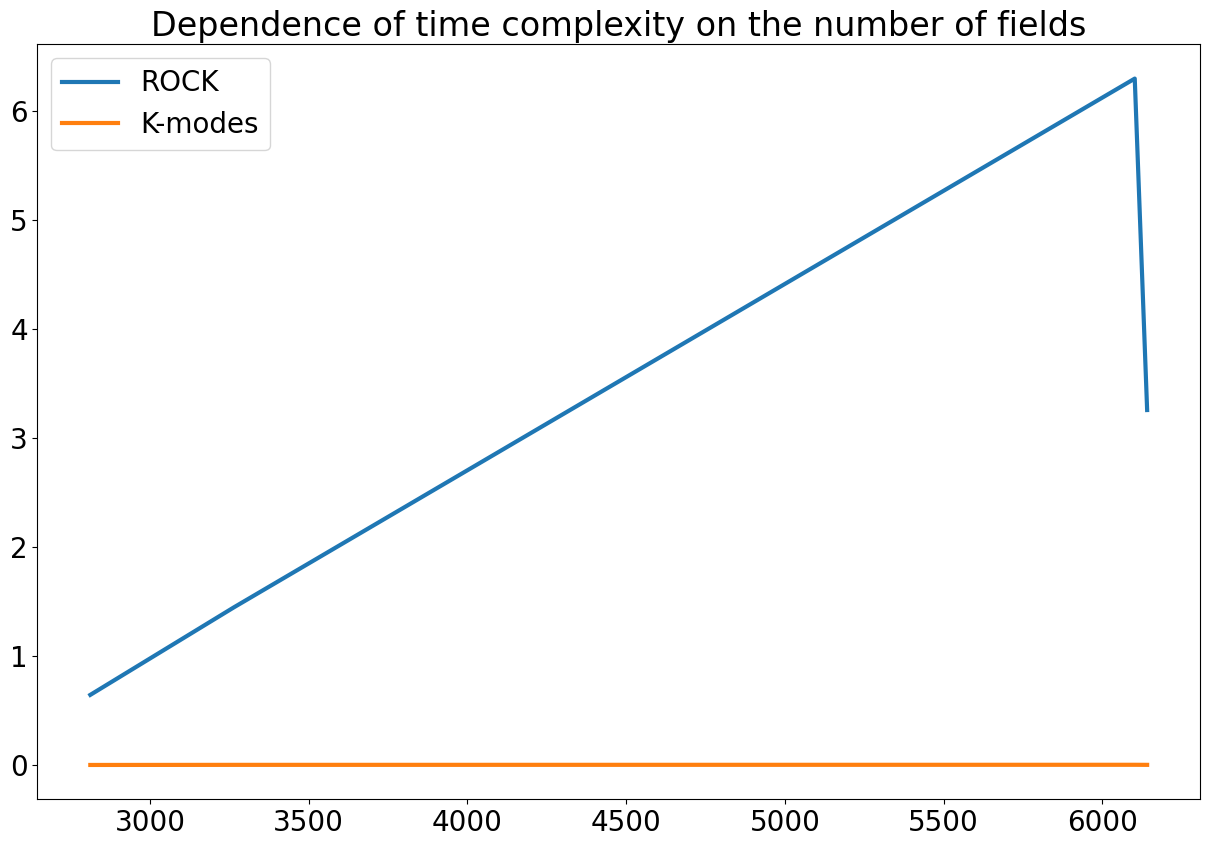

In [109]:
fields = np.multiply(rows, columns)
x, y = zip(*sorted(zip(fields, rock_times)))
plt.plot(x, y, label='ROCK', linewidth=3.0)
x, y = zip(*sorted(zip(fields, kmodes_times)))
plt.plot(x, y, label='K-modes', linewidth=3.0)
plt.legend(loc='best')
plt.title("Dependence of time complexity on the number of fields")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20, 'axes.labelsize': 20})
plt.rcParams['figure.dpi'] = 100
plt.show()

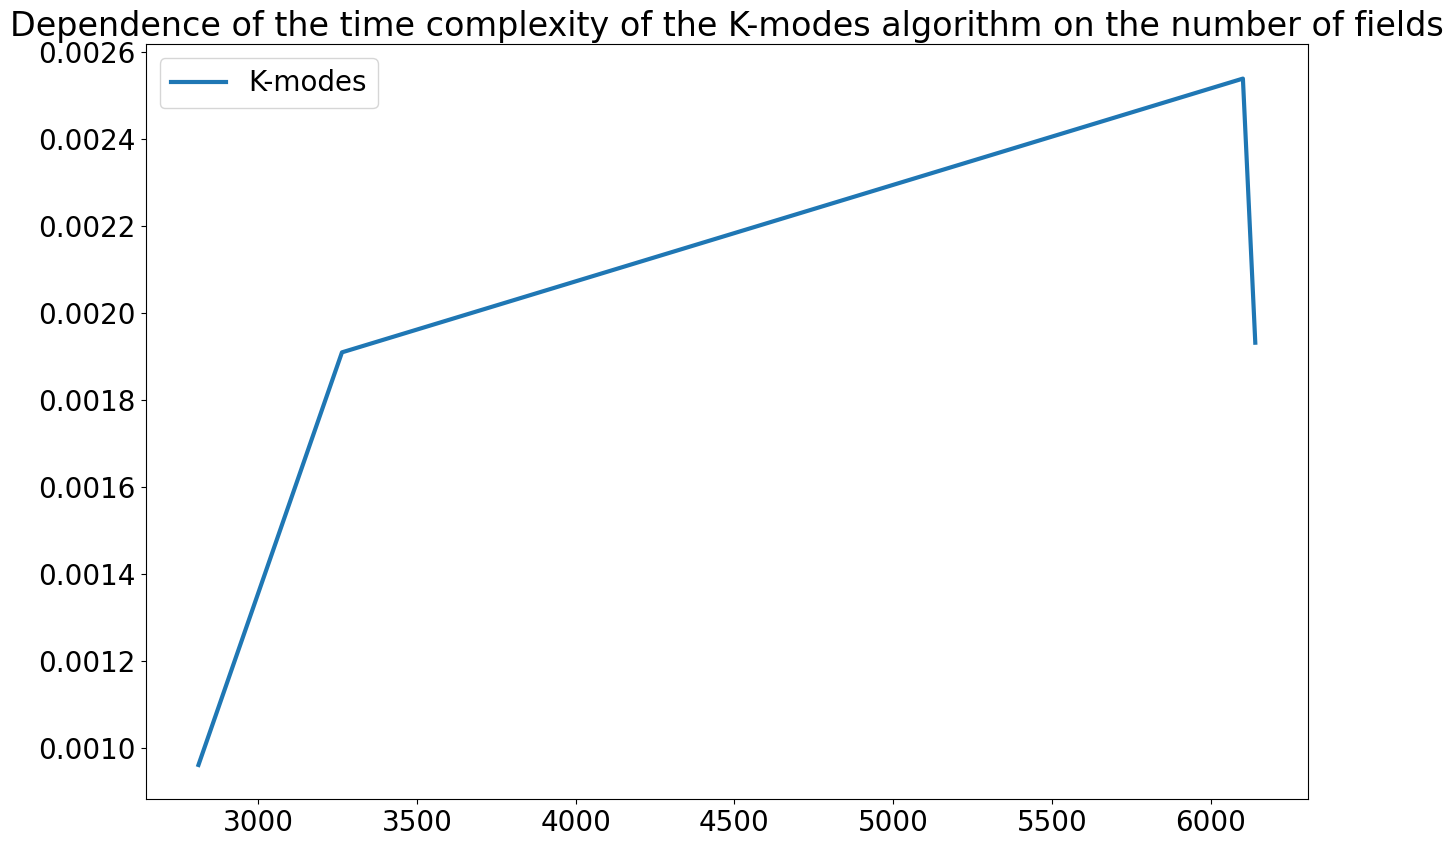

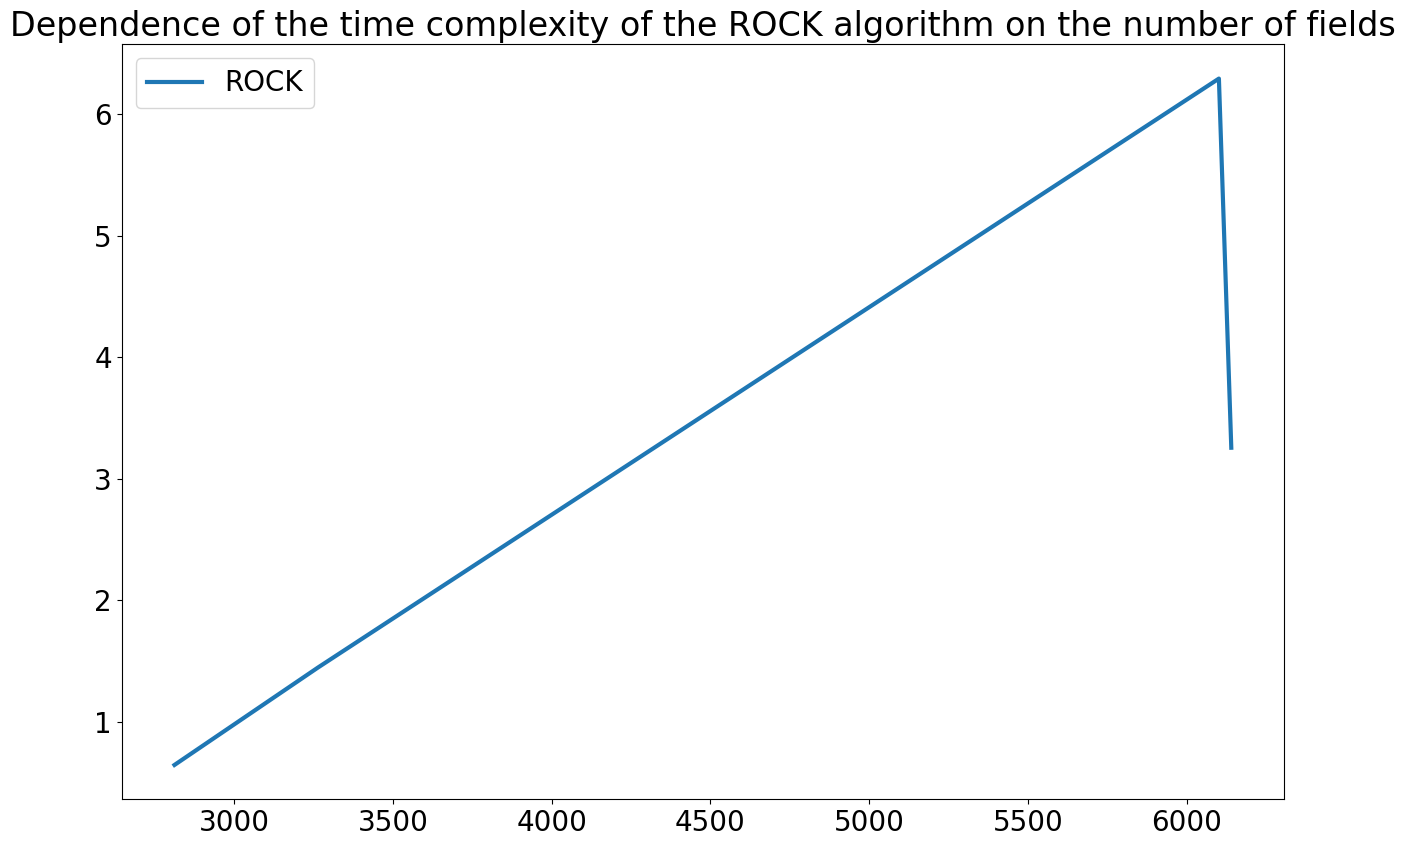

In [112]:
x, y = zip(*sorted(zip(fields, kmodes_times)))
plt.plot(x, y, label='K-modes', linewidth=3.0)
plt.legend(loc='best')
plt.title("Dependence of the time complexity of the K-modes algorithm on the number of fields")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20, 'axes.labelsize': 20})
plt.rcParams['figure.dpi'] = 100
plt.show()
x, y = zip(*sorted(zip(fields, rock_times)))
plt.plot(x, y, label='ROCK', linewidth=3.0)
plt.legend(loc='best')
plt.title("Dependence of the time complexity of the ROCK algorithm on the number of fields")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20, 'axes.labelsize': 20})
plt.rcParams['figure.dpi'] = 100
plt.show()